# Encoding numerical variables
### Sometimes, numerical encoding is necessary to represent the data. Like we have data and one column the no.of downloads contains the values like 1020102, 203, 90, 32132323. It can't better plot the data on the graph.

# Methods
### (i) Discretization(binning)
### (ii) Binarization

# Discretization 
Discretization is a process of transforming continuous varaible into discrete variables by creating a set of contiguous interval that span the ranges of varaible values. Discretization also called bining where bin is a alternative name of interval.

Why we use?
### (i) To handle outliers
### (ii) To remove the values spread 

# Types of bining 
### (i) Supervised (Decision tree bining)
### (ii) Unsupervised (Equal width or uniform, Equal frequency quantile, K Means binning)
### (iii) Custom bining

In [69]:
# Equal width/ Uniform bining
# formuala max-min/bins
# Equal frequency/ quantile binning corporates the percentage of total observations
# K means binning used when our data in clusters

In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [71]:
df=pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [72]:
df.sample(10)

,Survived,Age,Fare
160,0,44.0,16.1000
60,0,22.0,7.2292
207,1,26.0,18.7875
692,1,NaN,56.4958
137,0,37.0,53.1000
53,1,29.0,26.0000
33,0,66.0,10.5000
255,1,29.0,15.2458
815,0,NaN,0.0000
744,1,31.0,7.9250


In [73]:
df.dropna(inplace=True)

In [74]:
df.shape

(714, 3)

In [75]:
X=df.iloc[:, [1,2]]
Y=df.iloc[:, 0]

In [76]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [78]:
clfr=DecisionTreeClassifier()
clfr.fit(X_train, Y_train)

DecisionTreeClassifier()

In [79]:
pred=clfr.predict(X_test)

In [80]:
accuracy_score(Y_test, pred)

0.6363636363636364

In [81]:
np.mean(cross_val_score(clfr, X, Y, cv=10, scoring='accuracy'))

0.6345070422535211

In [110]:
kbins_age=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
kbins_fare=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

In [111]:
trf=ColumnTransformer([
  ('first', kbins_age,[0]),
  ('second', kbins_fare,[1])
])

In [112]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.fit_transform(X_test)

In [113]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,  12.42852009,  22.57533926,  34.86118996,
               48.41736111,  66.54235833,  96.85485833, 133.925     ,
              189.5375    , 369.9271    , 512.3292    ])             ],
      dtype=object)

In [114]:
output=pd.DataFrame({'age': X_train['Age'], 'age_trf': X_train_trf[:, 0], 'Fare': X_train['Fare'], 'fare_trf': X_train_trf[:, 1]})

In [115]:
output['age_lables']=pd.cut(x=X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_lables']=pd.cut(x=X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [116]:
output

,age,age_trf,Fare,fare_trf,age_lables,fare_lables
328,31.0,3.0,20.5250,1.0,"(25.397, 31.566]","(12.429, 22.575]"
73,26.0,3.0,14.4542,1.0,"(25.397, 31.566]","(12.429, 22.575]"
253,30.0,3.0,16.1000,1.0,"(25.397, 31.566]","(12.429, 22.575]"
719,33.0,4.0,7.7750,0.0,"(31.566, 37.095]","(0.0, 12.429]"
666,25.0,3.0,13.0000,1.0,"(19.763, 25.397]","(12.429, 22.575]"
...,...,...,...,...,...,...
92,46.0,5.0,61.1750,3.0,"(42.194, 48.507]","(48.417, 66.542]"
134,25.0,3.0,13.0000,1.0,"(19.763, 25.397]","(12.429, 22.575]"
337,41.0,5.0,134.5000,5.0,"(37.095, 42.194]","(133.925, 189.538]"
548,33.0,4.0,20.5250,1.0,"(31.566, 37.095]","(12.429, 22.575]"


In [118]:
clfr1=DecisionTreeClassifier()
clfr1.fit(X_train_trf, Y_train)

DecisionTreeClassifier()

In [120]:
pred=clfr1.predict(X_test_trf)

In [121]:
accuracy_score(Y_test, pred)

0.6573426573426573

In [124]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(clfr1, X, Y, cv=10, scoring='accuracy'))

0.6331181533646322

In [127]:
def discretize(bins, strategy):
 kbins_age=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
 kbins_fare=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
 trf2=ColumnTransformer([
    ('first',kbins_age,[0]),
    ('second', kbins_fare, [1])
 ])
 X_trf=trf2.fit_transform(X)
 print(np.mean(cross_val_score(DecisionTreeClassifier(), X,Y, scoring='accuracy')))
 plt.figure(figsize=(14,4))
 plt.subplot(121)
 plt.hist(X['Age'])
 plt.title('Before')
 plt.subplot(122)
 plt.hist(X_trf[:, 0], color='red')
 plt.title('After')

0.6176598049837487


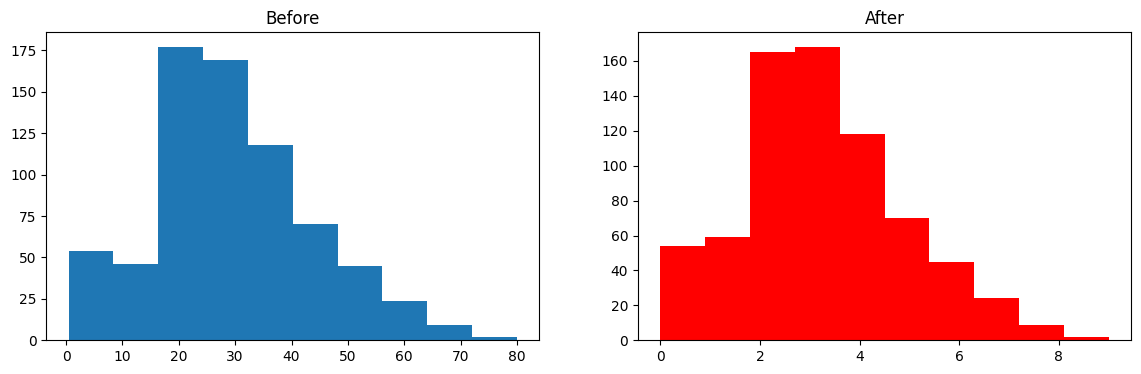

In [129]:
discretize(4, 'uniform')

### Custom Binning
### Custom binning refers to the process of creating bins or intervals for data that are tailored to specific requirements or domain knowledge. Instead of using a fixed number of equal-sized bins or predefined intervals, custom binning allows you to define bins based on your specific needs and insights about the data. In custom binning, you have control over the bin edges and can determine how to group the data values. This can be useful in various scenarios, such as when you want to emphasize certain ranges, account for outliers, or create bins based on specific business rules.

# Binarization
### In binarization convert continuous value into numerical value. For example, if your annual income is greater then six lac then you assign 0 otherwise you assign 1. Accoring to previous example if copy=True than  new column created otherwise changing occur in old column.  

In [130]:
df1=pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'SibSp' ,'Parch','Survived'])

In [131]:
df1.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [132]:
df1.dropna(inplace=True)

In [134]:
df1['family']=df1['SibSp'] + df1['Parch']

In [145]:
df1.drop(columns=['SibSp', 'Parch'], inplace=True)

In [146]:
df1

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
...,...,...,...,...
885,0,39.0,29.1250,5
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
889,1,26.0,30.0000,0


In [148]:
X=df1.drop(columns=['Survived'], axis=1)
Y=df1['Survived']

In [149]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [153]:
clfr2=DecisionTreeClassifier()
clfr2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [154]:
pred=clfr2.predict(X_test)

In [155]:
accuracy_score(Y_test, pred)

0.6363636363636364

In [156]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring='accuracy'))

0.6499021909233177

In [157]:
from sklearn.preprocessing import Binarizer

In [169]:
#now check those person who traveling alone
trf3=ColumnTransformer([
('bin', Binarizer(copy=False), ['family'])
], remainder='passthrough')

In [161]:
travelingalone

ColumnTransformer(remainder='passthrough',
                  transformers=[('bin', Binarizer(copy=False), ['family'])])

In [171]:
clfr2=DecisionTreeClassifier()
X_train_trf3=trf3.fit_transform(X_train)
X_test_trf3=trf3.fit_transform(X_test)

In [172]:
clfr2.fit(X_train_trf3, Y_train)

DecisionTreeClassifier()

In [176]:
pred2=clfr2.predict(X_test_trf3)

In [177]:
accuracy_score(Y_test, pred2)

0.5944055944055944

In [178]:
np.mean(cross_val_score(clfr2, X, Y, scoring='accuracy', cv=10))

0.6499217527386542